###**Aprendizaje No Supervisado**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#ignorar warning para que quede mejor el notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('covid-vaccination-vs-death_ratio.csv')

In [3]:
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [4]:
df.shape

(32911, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'New_deaths',
       'population', 'ratio'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


In [7]:
df.isna().sum()

Unnamed: 0                 0
country                    0
iso_code                   0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
ratio                      0
dtype: int64

In [8]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       

In [9]:
df['New_deaths'].value_counts()

0       7131
1       2042
2       1540
3       1237
4        962
        ... 
1476       1
1417       1
1295       1
2641       1
770        1
Name: New_deaths, Length: 1459, dtype: int64

##**Aplicamos Kmeans**

###Escalamos los Datos

In [10]:
scaler = StandardScaler()
scaler.fit(df[['people_fully_vaccinated', 'New_deaths']])
df_scaled = scaler.transform(df[['people_fully_vaccinated', 'New_deaths']])

In [11]:
df_scaled = pd.DataFrame(data = df_scaled, columns = df[['people_fully_vaccinated', 'New_deaths']].columns)

##Seleccionamos variables para el modelo

###Consideramos solo 2 Variables

In [12]:
X=df_scaled[['people_fully_vaccinated', 'New_deaths']].values

##Metodod del Codo

In [13]:
K = np.arange(1, 11)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

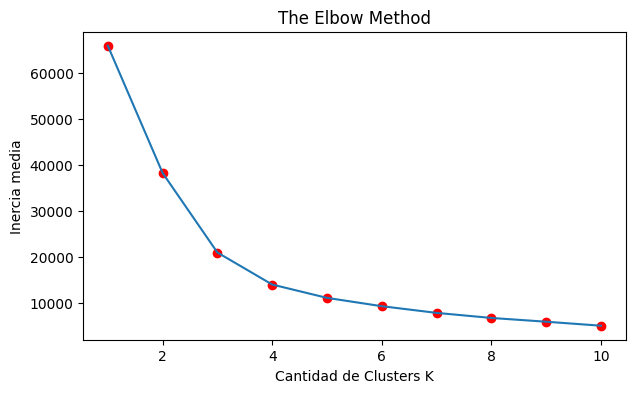

In [14]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('The Elbow Method')
plt.show()

###El quiebre lo vemos en K3

##**Modelo**

###Vamos a ajustar el modelo a Cluster=3

In [15]:
kmeansmodel = KMeans(n_clusters= 3, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [18]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2], dtype=int32)

##Centroides

In [19]:
centros = kmeansmodel.cluster_centers_
print(centros)

[[-0.0799872  -0.11813436]
 [ 1.10099123  5.71541841]
 [12.01208146  0.80302051]]


###Visualizamos los Clusters

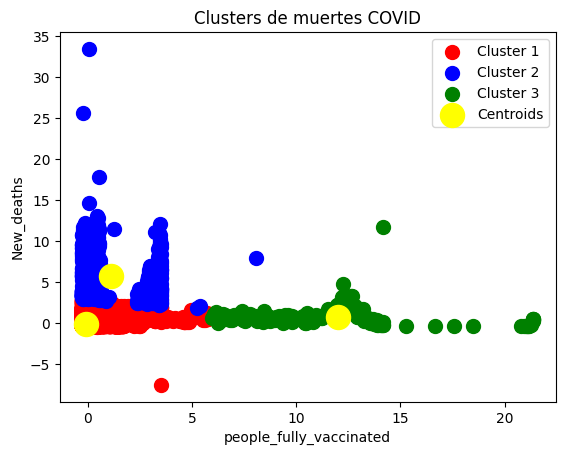

In [20]:


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de muertes COVID')
plt.xlabel('people_fully_vaccinated')
plt.ylabel('New_deaths')
plt.legend()
plt.show()

##Interpretación del modelo con K-means

**Cluster 1 (rojo)**: poca poblacion totalmente vacunada y
pocas muertes por COVID

**Cluster 2 (azul)** : menos poblacion totalmente vacunada y mas muertes por COVID

**Cluster 3 (verde)** : mas poblacion totalmente vacunada y menos muertes por COVID



##Metodo Silhouette

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.9054073079349497


###Nos da un coeficiente de 0.90, por lo que esto nos indicaría que tenemos una buena separación entre los clusters.

In [ ]:
K = np.arange(2,10)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(X)
  lista_silueta.append(silhouette_score(X, kmeans_silueta.labels_))

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

#⚛Conclusion

Con el metodo K Mean podemos dividir los paises en grupos segun cantidad de muertes y poblacion con vacunacion total.
Esto nos permite poder realizar análisis al interior de los grupos sobre que factores incidieron en las muertes por COVID mas alla de la vacunación por ejemplo el estado del sistema sanitario, las políticas implementadas, entre otros.